Ödev 1:
Minst handwritten datasını kullanarak bir adet CNN ağ yapısı geliştiriniz.
Ağ yapısı:
Conv2D(32,(3,3))
relu activation
Conv2D(64,(3,3))
relu activation
Maxpooling ((2,2))
Conv2D(128,(3,3))
relu activation
Conv2D(64,(3,3))
relu activation
Flatten()
Dense 256
dropout 0.25
dense 128
dropout 0.3
dense layer for last (Buradaki bilgileri sizden bekliyorum.)

10 epoch olacak şekilde çalıştırmanızı isitiyorum.

daha sonrasında bathc_size 32 64 128 256 512 1024 olacak şekilde deneyiniz. Accuracy değerlerini ve çalışma süreleriniz karşılaştırnız. Bunu plot olarak çizdiriniz.


Veriyi Yüklüyoruz.

In [87]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [88]:
img_rows=x_train[0].shape[0]
img_cols=x_train[1].shape[1]

Verimizi yeniden şekillendiriyoruz.

In [89]:
x_train=x_train.reshape(len(x_train),img_rows,img_cols,1)
x_test=x_test.reshape(len(x_test),img_rows,img_cols,1)

In [90]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

Veriyi Normalize Ediyoruz.

In [91]:
x_train /= 255
x_test /= 255

In [92]:
from keras.utils import np_utils

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [93]:
num_classes = y_test.shape[1]

Modelimizi Oluşturuyoruz:

In [94]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
import time

In [95]:
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Dropout(0.3))
model.add(Dense(num_classes,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer=SGD(0.01),
              metrics=["accuracy"])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 64)          73792     
                                                                 
 flatten_3 (Flatten)         (None, 4096)              0         
                                                      

Ve modelimizi eğitiyoruz.Sırasıyla Batch Size 32,64,128,256,512 ve 1024 olacak şekilde 6 kez eğitiyoruz...

In [96]:
batch_list = [32,64,128,256,512,1024]# iteration = 20
batch=32
epochs = 10
AccforBatch=[]
Comp_time=[]
start_time = time.time()
history1 = model.fit(x_train,y_train,batch_size=batch,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
score1= model.evaluate(x_test,y_test)
time1=round((time.time() - start_time), 3)
print("test loss: ",score1[0])
print("test acc: ",score1[1])
AccforBatch.append(score1[1])
Comp_time.append(time1)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3580 - accuracy: 0.8880 - val_loss: 0.0879 - val_accuracy: 0.9729
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1101 - accuracy: 0.9674 - val_loss: 0.0596 - val_accuracy: 0.9814
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0812 - accuracy: 0.9747 - val_loss: 0.0439 - val_accuracy: 0.9867
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0647 - accuracy: 0.9802 - val_loss: 0.0436 - val_accuracy: 0.9854
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0545 - accuracy: 0.9835 - val_loss: 0.0374 - val_accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0489 - accuracy: 0.9854 - val_loss: 0.0345 - val_accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0433 - accuracy: 0.9866 - val_loss: 0.0375 - val_accura

In [97]:
batch=64
epochs = 10
start_time = time.time()
history2 = model.fit(x_train,y_train,batch_size=batch,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
score2= model.evaluate(x_test,y_test)
time2=round((time.time() - start_time), 3)
print("test loss: ",score2[0])
print("test acc: ",score2[1])
AccforBatch.append(score2[1])
Comp_time.append(time2)

Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0251 - accuracy: 0.9925 - val_loss: 0.0260 - val_accuracy: 0.9915
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0242 - accuracy: 0.9927 - val_loss: 0.0275 - val_accuracy: 0.9898
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0221 - accuracy: 0.9928 - val_loss: 0.0270 - val_accuracy: 0.9912
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0208 - accuracy: 0.9934 - val_loss: 0.0240 - val_accuracy: 0.9917
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0198 - accuracy: 0.9940 - val_loss: 0.0270 - val_accuracy: 0.9913
Epoch 6/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0187 - accuracy: 0.9941 - val_loss: 0.0245 - val_accuracy: 0.9918
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0182 - accuracy: 0.9942 - val_loss: 0.0248 - val_accuracy: 0.9921
Epoch 

In [98]:
batch=128
epochs = 10
start_time = time.time()
history3 = model.fit(x_train,y_train,batch_size=batch,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
score3= model.evaluate(x_test,y_test)
time3=round((time.time() - start_time), 3)
print("test loss: ",score3[0])
print("test acc: ",score3[1])
AccforBatch.append(score3[1])
Comp_time.append(time3)

Epoch 1/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0133 - accuracy: 0.9957 - val_loss: 0.0244 - val_accuracy: 0.9928
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.0231 - val_accuracy: 0.9925
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0121 - accuracy: 0.9962 - val_loss: 0.0246 - val_accuracy: 0.9920
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0114 - accuracy: 0.9967 - val_loss: 0.0251 - val_accuracy: 0.9922
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.0239 - val_accuracy: 0.9922
Epoch 6/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.0247 - val_accuracy: 0.9928
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0112 - accuracy: 0.9964 - val_loss: 0.0248 - val_accuracy: 0.9923

In [99]:
batch=256
epochs = 10
start_time = time.time()
history4 = model.fit(x_train,y_train,batch_size=batch,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
score4= model.evaluate(x_test,y_test)
time4=round((time.time() - start_time), 3)
print("test loss: ",score4[0])
print("test acc: ",score4[1])
AccforBatch.append(score4[1])
Comp_time.append(time4)

Epoch 1/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0092 - accuracy: 0.9973 - val_loss: 0.0240 - val_accuracy: 0.9931
Epoch 2/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0088 - accuracy: 0.9971 - val_loss: 0.0246 - val_accuracy: 0.9921
Epoch 3/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0084 - accuracy: 0.9975 - val_loss: 0.0247 - val_accuracy: 0.9927
Epoch 4/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0087 - accuracy: 0.9974 - val_loss: 0.0246 - val_accuracy: 0.9924
Epoch 5/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0089 - accuracy: 0.9972 - val_loss: 0.0247 - val_accuracy: 0.9921
Epoch 6/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0086 - accuracy: 0.9975 - val_loss: 0.0244 - val_accuracy: 0.9928
Epoch 7/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0082 - accuracy: 0.9977 - val_loss: 0.0245 - val_accuracy: 0.9931

In [100]:
batch=512
epochs = 10
start_time = time.time()
history5 = model.fit(x_train,y_train,batch_size=batch,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
score5= model.evaluate(x_test,y_test)
time5=round((time.time() - start_time), 3)
print("test loss: ",score5[0])
print("test acc: ",score5[1])
AccforBatch.append(score5[1])
Comp_time.append(time5)

Epoch 1/10
118/118 [==============================] - 4s 36ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.0256 - val_accuracy: 0.9923
Epoch 2/10
118/118 [==============================] - 4s 34ms/step - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.0250 - val_accuracy: 0.9925
Epoch 3/10
118/118 [==============================] - 4s 34ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.0257 - val_accuracy: 0.9925
Epoch 4/10
118/118 [==============================] - 4s 35ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.0252 - val_accuracy: 0.9932
Epoch 5/10
118/118 [==============================] - 4s 34ms/step - loss: 0.0074 - accuracy: 0.9976 - val_loss: 0.0253 - val_accuracy: 0.9926
Epoch 6/10
118/118 [==============================] - 4s 35ms/step - loss: 0.0079 - accuracy: 0.9973 - val_loss: 0.0256 - val_accuracy: 0.9928
Epoch 7/10
118/118 [==============================] - 4s 35ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.0267 - val_accuracy: 0.9923

In [101]:
batch=1024
epochs = 10
start_time = time.time()
history6 = model.fit(x_train,y_train,batch_size=batch,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
score6= model.evaluate(x_test,y_test)
time6=round((time.time() - start_time), 3)
print("test loss: ",score6[0])
print("test acc: ",score6[1])
AccforBatch.append(score6[1])
Comp_time.append(time6)

Epoch 1/10
59/59 [==============================] - 4s 69ms/step - loss: 0.0063 - accuracy: 0.9981 - val_loss: 0.0258 - val_accuracy: 0.9923
Epoch 2/10
59/59 [==============================] - 4s 66ms/step - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.0257 - val_accuracy: 0.9924
Epoch 3/10
59/59 [==============================] - 4s 66ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.0256 - val_accuracy: 0.9929
Epoch 4/10
59/59 [==============================] - 4s 67ms/step - loss: 0.0069 - accuracy: 0.9980 - val_loss: 0.0257 - val_accuracy: 0.9926
Epoch 5/10
59/59 [==============================] - 4s 68ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.0256 - val_accuracy: 0.9923
Epoch 6/10
59/59 [==============================] - 4s 67ms/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 0.0257 - val_accuracy: 0.9927
Epoch 7/10
59/59 [==============================] - 4s 69ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.0256 - val_accuracy: 0.9925
Epoch 8/10
59

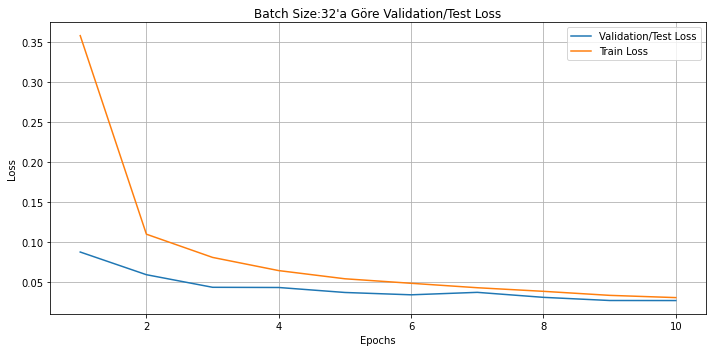

In [130]:
history_dict1 = history1.history
loss_values = history_dict1["loss"]
val_loss_values = history_dict1["val_loss"]
epochs = range(1,len(val_loss_values)+1)
line1 = plt.plot(epochs,val_loss_values,label="Validation/Test Loss")
line2 = plt.plot(epochs,loss_values,label="Train Loss")
plt.title("Batch Size:32'a Göre Validation/Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

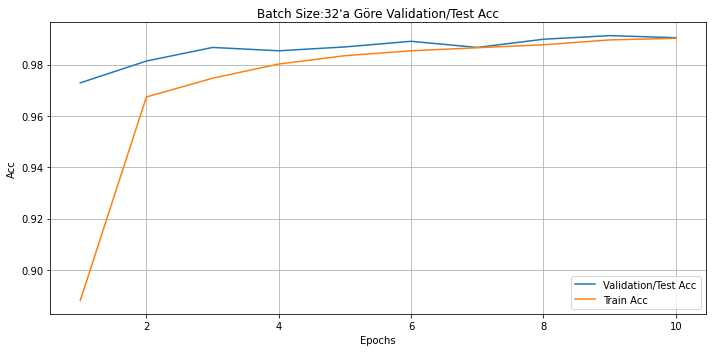

In [129]:
history_dict1 = history1.history
acc_values = history_dict1["accuracy"]
val_acc_values = history_dict1["val_accuracy"]
epochs = range(1,len(val_acc_values)+1)
line1 = plt.plot(epochs,val_acc_values,label="Validation/Test Acc")
line2 = plt.plot(epochs,acc_values,label="Train Acc")
plt.title("Batch Size:32'a Göre Validation/Test Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.grid(True)
plt.legend()
plt.show()

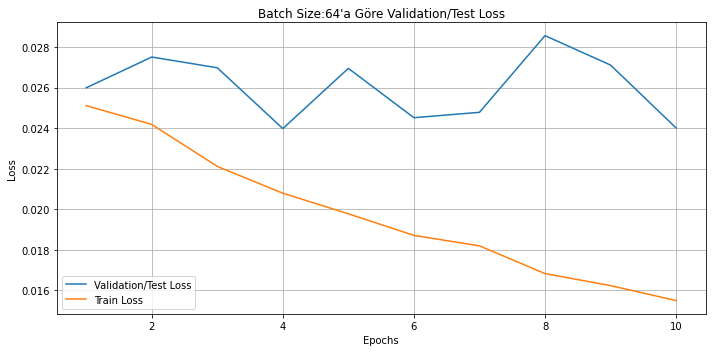

In [128]:
history_dict2 = history2.history
loss_values = history_dict2["loss"]
val_loss_values = history_dict2["val_loss"]
epochs = range(1,len(val_loss_values)+1)
line1 = plt.plot(epochs,val_loss_values,label="Validation/Test Loss")
line2 = plt.plot(epochs,loss_values,label="Train Loss")
plt.title("Batch Size:64'a Göre Validation/Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

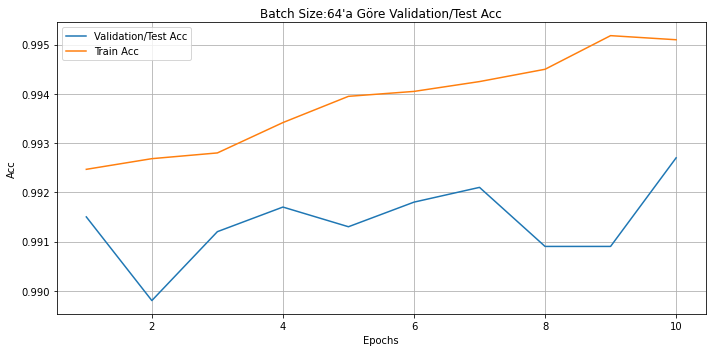

In [126]:
history_dict2 = history2.history
acc_values = history_dict2["accuracy"]
val_acc_values = history_dict2["val_accuracy"]
epochs = range(1,len(val_acc_values)+1)
line1 = plt.plot(epochs,val_acc_values,label="Validation/Test Acc")
line2 = plt.plot(epochs,acc_values,label="Train Acc")
plt.title("Batch Size:64'a Göre Validation/Test Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.grid(True)
plt.legend()
plt.show()

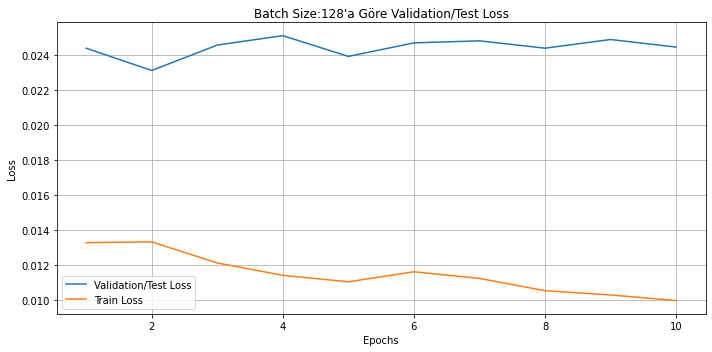

In [125]:
history_dict3 = history3.history
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1,len(val_loss_values)+1)
line1 = plt.plot(epochs,val_loss_values,label="Validation/Test Loss")
line2 = plt.plot(epochs,loss_values,label="Train Loss")
plt.title("Batch Size:128'a Göre Validation/Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

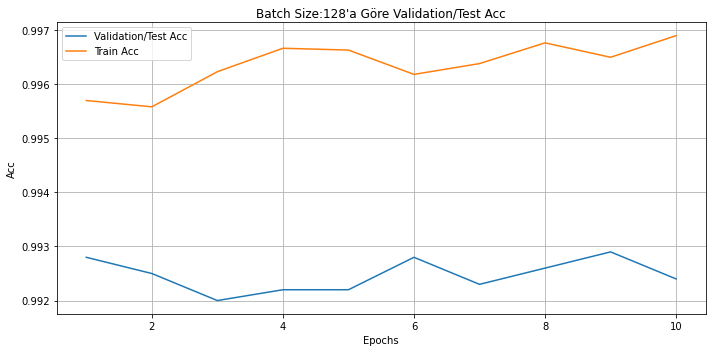

In [124]:
history_dict3 = history3.history
acc_values = history_dict3["accuracy"]
val_acc_values = history_dict3["val_accuracy"]
epochs = range(1,len(val_acc_values)+1)
line1 = plt.plot(epochs,val_acc_values,label="Validation/Test Acc")
line2 = plt.plot(epochs,acc_values,label="Train Acc")
plt.title("Batch Size:128'a Göre Validation/Test Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.grid(True)
plt.legend()
plt.show()

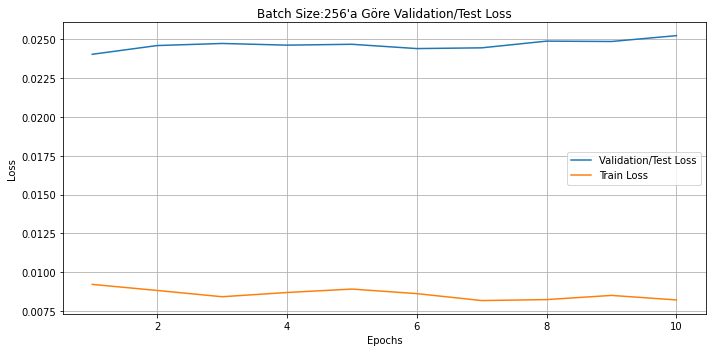

In [123]:
history_dict4 = history4.history
loss_values = history_dict4["loss"]
val_loss_values = history_dict4["val_loss"]
epochs = range(1,len(val_loss_values)+1)
line1 = plt.plot(epochs,val_loss_values,label="Validation/Test Loss")
line2 = plt.plot(epochs,loss_values,label="Train Loss")
plt.title("Batch Size:256'a Göre Validation/Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

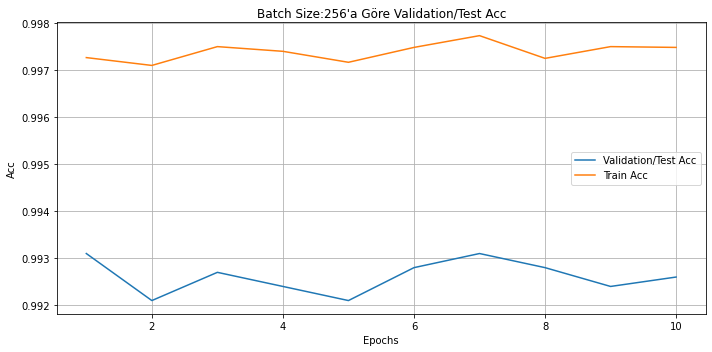

In [122]:
history_dict4 = history4.history
acc_values = history_dict4["accuracy"]
val_acc_values = history_dict4["val_accuracy"]
epochs = range(1,len(val_acc_values)+1)
line1 = plt.plot(epochs,val_acc_values,label="Validation/Test Acc")
line2 = plt.plot(epochs,acc_values,label="Train Acc")
plt.title("Batch Size:256'a Göre Validation/Test Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.grid(True)
plt.legend()
plt.show()

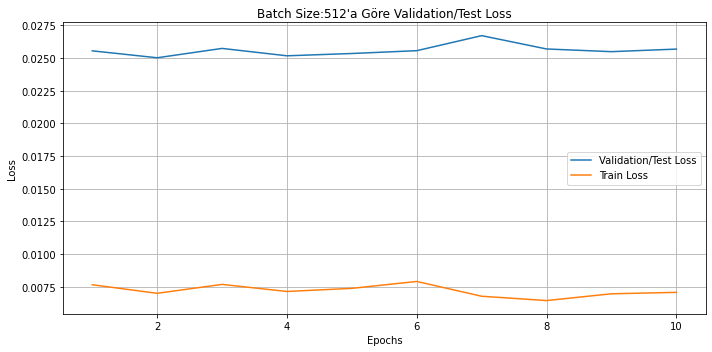

In [119]:
history_dict5 = history5.history
loss_values = history_dict5["loss"]
val_loss_values = history_dict5["val_loss"]
epochs = range(1,len(val_loss_values)+1)
line1 = plt.plot(epochs,val_loss_values,label="Validation/Test Loss")
line2 = plt.plot(epochs,loss_values,label="Train Loss")
plt.title("Batch Size:512'a Göre Validation/Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

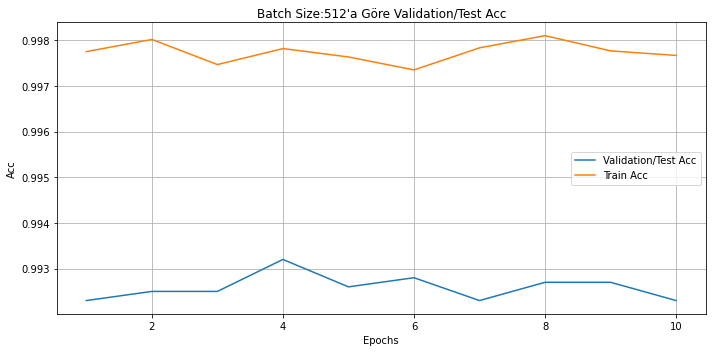

In [120]:
history_dict5 = history5.history
acc_values = history_dict5["accuracy"]
val_acc_values = history_dict5["val_accuracy"]
epochs = range(1,len(val_acc_values)+1)
line1 = plt.plot(epochs,val_acc_values,label="Validation/Test Acc")
line2 = plt.plot(epochs,acc_values,label="Train Acc")
plt.title("Batch Size:512'a Göre Validation/Test Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.grid(True)
plt.legend()
plt.show()

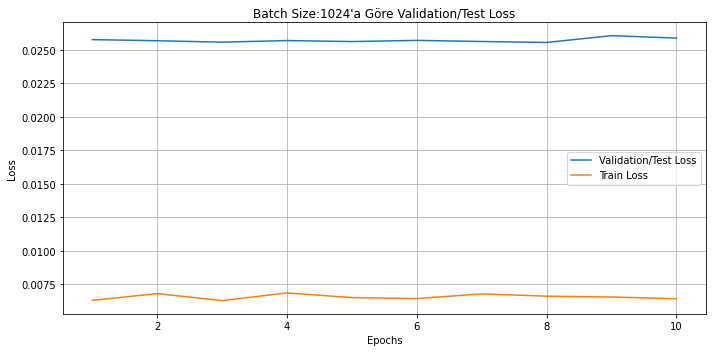

In [118]:
history_dict6 = history6.history
loss_values = history_dict6["loss"]
val_loss_values = history_dict6["val_loss"]
epochs = range(1,len(val_loss_values)+1)
line1 = plt.plot(epochs,val_loss_values,label="Validation/Test Loss")
line2 = plt.plot(epochs,loss_values,label="Train Loss")
plt.title("Batch Size:1024'a Göre Validation/Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

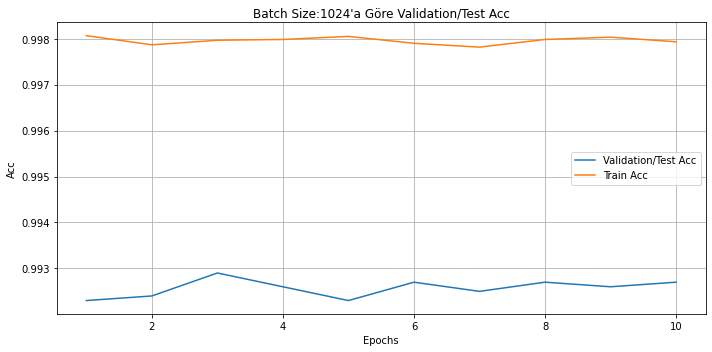

In [117]:
history_dict6 = history6.history
acc_values = history_dict6["accuracy"]
val_acc_values = history_dict6["val_accuracy"]
epochs = range(1,len(val_acc_values)+1)
line1 = plt.plot(epochs,val_acc_values,label="Validation/Test Acc")
line2 = plt.plot(epochs,acc_values,label="Train Acc")
plt.title("Batch Size:1024'a Göre Validation/Test Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.grid(True)
plt.legend()
plt.show()

Computing Time ve Batch Size'a göre bir grafik çizdirirsek.

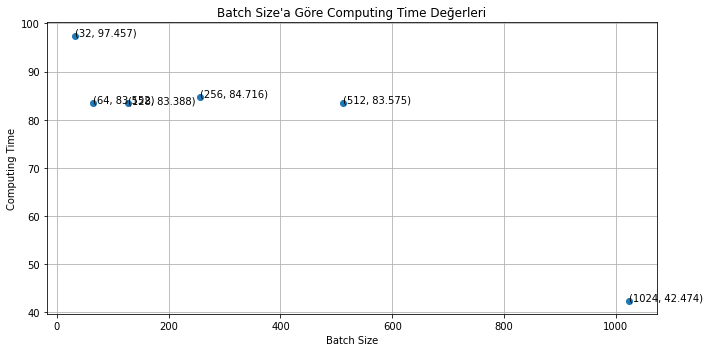

In [116]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
plt.scatter(batch_list,Comp_time)
plt.title("Batch Size'a Göre Computing Time Değerleri")
plt.xlabel("Batch Size")
plt.ylabel("Computing Time")
for i, j in zip(batch_list,Comp_time):
   plt.text(i, j, '({}, {})'.format(i, j))
plt.grid(True)
plt.show()